In [ ]:
# Generate the corresponding three optimal models of the the three different lengths of the training sets.

# Load the database from google drive

import zipfile
from google.colab import drive
import os

drive.mount('/content/drive/')

# Unzip the database from google drive to Colab
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Dissertation/Factor/Database.zip", 'r')
zip_ref.extractall("/content/Database")
zip_ref.close()

# Unzip the required .py files from google drive to Colab
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Dissertation/Factor/Py.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

# From Google drive to Colab
!cp -rf "/content/drive/My Drive/Colab Notebooks/Dissertation/Factor/Database/result" '/content/Database'

!pip install tushare
!pip install jqdatasdk

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
     |████████████████████████████████| 215kB 5.2MB/s 
     |████████████████████████████████| 204kB 8.7MB/s 
     |████████████████████████████████| 133kB 13.8MB/s 
     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 10.4MB 8.4MB/s 
     |████████████████████████████████| 501kB 37.2MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
  Created wheel for thr

In [ ]:
if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Dissertation/Factor/Database/result"):
    os.makedirs("/content/drive/My Drive/Colab Notebooks/Dissertation/Factor/Database/result")

# From Colab to Google drive
!cp -rf '/content/Database/result' "/content/drive/My Drive/Colab Notebooks/Dissertation/Factor/Database"

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 
0.5529100529100529
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  7.2min finished


{'colsample_bytree': 0.7, 'subsample': 0.7}  :  0.7363  ,  0.0263
{'colsample_bytree': 0.7, 'subsample': 0.75}  :  0.7331  ,  0.0258
{'colsample_bytree': 0.7, 'subsample': 0.8}  :  0.7339  ,  0.0277
{'colsample_bytree': 0.7, 'subsample': 0.85}  :  0.7329  ,  0.0274
{'colsample_bytree': 0.7, 'subsample': 0.9}  :  0.7340  ,  0.0271
{'colsample_bytree': 0.75, 'subsample': 0.7}  :  0.7354  ,  0.0237
{'colsample_bytree': 0.75, 'subsample': 0.75}  :  0.7313  ,  0.0285
{'colsample_bytree': 0.75, 'subsample': 0.8}  :  0.7325  ,  0.0239
{'colsample_bytree': 0.75, 'subsample': 0.85}  :  0.7330  ,  0.0254
{'colsample_bytree': 0.75, 'subsample': 0.9}  :  0.7320  ,  0.0265
{'colsample_bytree': 0.8, 'subsample': 0.7}  :  0.7322  ,  0.0234
{'colsample_bytree': 0.8, 'subsample': 0.75}  :  0.7322  ,  0.0248
{'colsample_bytree': 0.8, 'subsample': 0.8}  :  0.7374  ,  0.0266
{'colsample_bytree': 0.8, 'subsample': 0.85}  :  0.7329  ,  0.0260
{'colsample_bytree': 0.8, 'subsample': 0.9}  :  0.7357  ,  0.0258

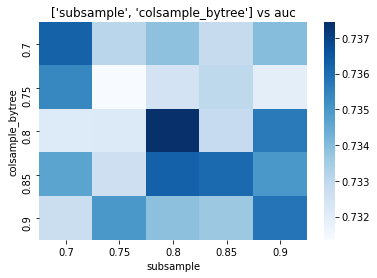

0.544973544973545


In [ ]:
# Take the previous 1-year data as the training set and generate the corresponding optimal model

import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,cross_validate

from Data_Cleaning import save_to_file,read_from_file,get_dataset_bydate,get_date_list,authorization_jq

# Plot the "n_estimators vs auc" curve figure
def plot_cvresult(cvresult,n_estimators,learning_rate,split_part=100,overwrite=False):
    plt.close()
    global training_year
    split_num=round(n_estimators/split_part)
    # plot
    test_means = cvresult['test-auc-mean'][::split_num]
    test_stds = cvresult['test-auc-std'][::split_num]

    train_means = cvresult['train-auc-mean'][::split_num]
    train_stds = cvresult['train-auc-std'][::split_num]

    x_axis = range(0, n_estimators)[::split_num]
    plt.errorbar(x_axis, test_means, yerr=test_stds, label='Test')
    plt.errorbar(x_axis, train_means, yerr=train_stds, label='Train')
    plt.title("n_estimators vs auc")
    plt.xlabel('n_estimators')
    plt.ylabel('auc')

    if (not overwrite) and os.path.exists('Database/result/'+str(training_year)+'/'+'n_estimators_'+str(learning_rate)+'_'+str(training_year)+'.png'):
        plt.show()
        return False
    plt.savefig('Database/result/'+str(training_year)+'/'+'n_estimators_'+str(learning_rate)+'_'+str(training_year)+'.png')
    plt.show()

# Plot the feature importance figures of the model
def plot_importance_custom(model, importance_type='weight',plot_bar_label=False, plot_importance_label=True, max_num_features=-1):
    plt.close()
    fig, ax = plt.subplots(figsize=(15, 15))
    # Plot the feature importance histogram
    if plot_bar_label:
        plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
        plt.show()

    # Plot the XGBoost built-in plot_importance figure
    if plot_importance_label:
        if max_num_features == -1:
            plot_importance(model, height=0.5, ax=ax, importance_type=importance_type)
        else:
            plot_importance(model, height=0.5, ax=ax, importance_type=importance_type, max_num_features=max_num_features)
        plt.show()

# Function to fit and predict the model
# cross validation enabled to obtain the best n_estimators if useTrainCV==True
def model_fit(model, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    global X_train,Y_train,training_year
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=Y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=50)
        n_estimators=cvresult.shape[0]
        model.set_params(n_estimators=n_estimators)

        save_to_file(cvresult,'cvresult_'+str(n_estimators)+'_'+str(model.learning_rate)+'_'+str(training_year),'Database/result/'+str(training_year)+'/'+'n_estimators',overwrite=False)
        plot_cvresult(cvresult,n_estimators,model.learning_rate)

    # Fit the model on the data
    model.fit(X_train, Y_train, eval_metric='auc')

    # Predict the training set:
    Y_pred = model.predict(X_train)
    Y_predprob = model.predict_proba(X_train)[:, 1]

    # Print the model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(Y_train.values, Y_pred))
    print("AUC Score (Train): %f" % roc_auc_score(Y_train, Y_predprob))

    plot_importance_custom(model)

# Print the grid search cv results
def print_grid_search_cv_results_(grid_search_model):
    for index, value in enumerate(grid_search_model.cv_results_['params']):
        print(value, " : ", '%.4f' % grid_search_model.cv_results_['mean_test_score'][index], ' , ',
              '%.4f' % grid_search_model.cv_results_['std_test_score'][index])
    print('Best Params: ', grid_search_model.best_params_)
    print(grid_search_model.best_score_)

# Plot the grid search auc figure given the model
def plot_grid_search_auc(grid_search_model,para_list,overwrite=False,plot_label=True):
    plt.close()
    # If there is only 1 parameter in the para_list
    if len(para_list)==1:
        para_label=list(para_list.keys())[0]
        para_range=list(para_list.values())[0]
        test_means = grid_search_model.cv_results_['mean_test_score']
        test_scores = np.array(test_means)

        #print(para_range,test_scores,para_label,sep='\n')
        plt.plot(para_range, test_scores, label=para_label)
        plt.legend()
        plt.xlabel(para_label)
        plt.ylabel('auc')
    # Two parameters in the para_list
    else:
        x_label=list(para_list.keys())[1]
        y_label=list(para_list.keys())[0]
        x_len=len(list(para_list.values())[1])
        y_len=len(list(para_list.values())[0])

        grid_visualisation=[]
        for pair in grid_search_model.cv_results_['mean_test_score']:
            grid_visualisation.append(pair)
        grid_visualisation=np.array(grid_visualisation)
        grid_visualisation.shape=(y_len,x_len)

        sns.heatmap(grid_visualisation,cmap='Blues')

        # Switch the x and y axis if length are equal
        if not x_len==y_len:
            plt.xticks(np.arange(x_len)+0.5,grid_search_model.param_grid[x_label])
            plt.yticks(np.arange(y_len)+0.5,grid_search_model.param_grid[y_label])
            plt.xlabel(x_label)
            plt.ylabel(y_label)
        else:
            plt.xticks(np.arange(y_len)+0.5,grid_search_model.param_grid[y_label])
            plt.yticks(np.arange(x_len)+0.5,grid_search_model.param_grid[x_label])
            plt.xlabel(y_label)
            plt.ylabel(x_label)
        
    path='Database/result/'+str(training_year)+'/' + str(list(para_list.keys()))+'_'+str(list(para_list.values()))+'_'+str(training_year) + '.png'
    if (not overwrite) and os.path.exists(path):
        if plot_label:
            plt.show()
        return False
    plt.title(str(list(para_list.keys()))+' vs auc')
    plt.savefig(path)
    if plot_label:
        plt.show()

# Grid search on the parameters
def grid_search_on_para(para_list,num,re_run=False,print_results=False,overwrite=False):
    global xgb_model,X_train,Y_train

    if (re_run==False) and (os.path.exists('Database/result/'+str(training_year)+'/'+'grid_search_model'+str(num)+'_'+str(training_year)+'.pkl')):
        grid_search_model = read_from_file('grid_search_model'+str(num)+'_'+str(training_year), 'Database/result/'+str(training_year))

    if (re_run) or (not os.path.exists('Database/result/'+str(training_year)+'/'+'grid_search_model'+str(num)+'_'+str(training_year)+'.pkl')) or re_run:
        global xgb_model,X_train,Y_train
        grid_search_model = GridSearchCV(estimator = xgb_model,
                               param_grid = para_list, scoring='roc_auc',n_jobs=-1,iid=False, cv=5, verbose=1)
        grid_search_model.fit(X_train,Y_train)
        save_to_file(grid_search_model,'grid_search_model'+str(num)+'_'+str(training_year),'Database/result/'+str(training_year),overwrite=True)
    # Print results
    if print_results:
        print_grid_search_cv_results_(grid_search_model)
        plot_grid_search_auc(grid_search_model,para_list,overwrite)
    else:
        plot_grid_search_auc(grid_search_model,para_list,overwrite,plot_label=False)

    return grid_search_model

# Return the model auc or acc on test set
def get_model_accuracy(model,prob_label=False):
    global X_train,Y_train,X_test,Y_gold
    model.fit(X_train,Y_train)
    Y_test=model.predict(X_test)
    Y_prob=model.predict_proba(X_test)
    accuracy=accuracy_score(Y_gold,Y_test)
    if prob_label:
        return accuracy,Y_prob
    else:
        return accuracy

if __name__ == '__main__':
    pro=authorization_jq(1)

    training_year=1
    interval=20
    start_date = '2007-01-01'
    end_date = '2020-07-15'
    base_date='2017-01-24'
    date_list = get_date_list(start_date, end_date, base_date, interval=interval)

    # Obtain the training set and the test set
    training_set, test_set = get_dataset_bydate(base_date,date_list,year=training_year)
    X_train=training_set.drop(['pchg', 'label'], axis=1)
    Y_train=training_set['label']
    #Y_train=training_set['label'].apply(lambda x:0 if x==-1 else 1)
    X_test=test_set.drop(['pchg', 'label'], axis=1)
    Y_gold=test_set['label']
    #Y_gold=test_set['label'].apply(lambda x:0 if x==-1 else 1)

    # Define the classifer
    xgb_model = XGBClassifier(
            learning_rate =0.1,
            n_estimators=200,
            max_depth=5,
            min_child_weight=1,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic',
            nthread=-1,
            scale_pos_weight=1,
            seed=27,
            tree_method="gpu_hist" # Gpu boost enable
            )

    # Grid search on learning_rate
    para_list10 = {
    'learning_rate':[0.05,0.1,0.15,0.2,0.3]
    }
    grid_search_on_para(para_list10,10)

    # Narrow the search
    para_list11 = {
    'learning_rate':[i/100.0 for i in range(1,10,1)],
    }
    grid_search_on_para(para_list11,11)

    xgb_model.learning_rate=0.04
    xgb_model.n_estimators=1000

    # Find the optimal number of n_estimators
    #model_fit(xgb_model)

    xgb_model.n_estimators=200
    # Grid search on max_depth and min_child_weight
    para_list1 = {
        'max_depth': range(3, 10, 2),
        'min_child_weight': range(1, 6, 2)
    }
    grid_search_on_para(para_list1,1)

    # Narrow the search
    para_list2 = {
        'max_depth': [6,7,8],
        'min_child_weight': [1,2,3,4,5]
    }
    grid_search_on_para(para_list2,2)

    xgb_model.max_depth=8
    xgb_model.min_child_weight=4

    # Grid search on gamma
    para_list3 = {
        'gamma':[i/10.0 for i in range(0,5)]
    }
    grid_search_on_para(para_list3,3)

    # Grid search on subsample and colsample_bytree
    para_list4 = {
        'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)]
    }   
    grid_search_on_para(para_list4,4)
    print(get_model_accuracy(xgb_model))

    # Narrow the search
    para_list5 = {
        'subsample':[i/100.0 for i in range(70,91,5)],
        'colsample_bytree':[i/100.0 for i in range(70,91,5)],
    }
    grid_search_on_para(para_list5,5,print_results=True,re_run=True,overwrite=True)

    xgb_model.subsample=0.8
    xgb_model.colsample_bytree=0.8

    # Grid search on reg_aplha
    para_list6 = {
    'reg_alpha':[1e-5,1e-2,0.1,1,100]
    }
    grid_search_on_para(para_list6,6)

    # Narrow the search
    para_list7 = {
    'reg_alpha':[0.001,0.005,0.01,0.03,0.05]
    }
    grid_search_on_para(para_list7,7)
    #grid_search_on_para(para_list7,7,re_run=True,print_results=True,overwrite=True)

    xgb_model.reg_alpha=0.005

    # Grid search on reg_lamda
    para_list8 = {
    'reg_lambda':[1e-5,1e-2,0.1,1,100]
    }
    grid_search_on_para(para_list8,8)

    # Narrow the search
    para_list9 = {
    'reg_lambda':[0.5,0.8,1,1.5,2,5,10]
    }
    grid_search_on_para(para_list9,9)

    model.kwargs['reg_lamda']=1

    xgb_model.n_estimators=5000
    #model_fit(xgb_model)

    # Final model concerning the 1-year training set
    xgb_model = XGBClassifier(
        learning_rate =0.04,
        n_estimators=200,
        max_depth=8,
        min_child_weight=4,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.005,
        reg_lamda=1,

        objective= 'binary:logistic',
        nthread=-1,
        scale_pos_weight=1,
        seed=27,
        tree_method="gpu_hist" # Gpu boost enable
        )
    print(get_model_accuracy(xgb_model))

plt.close()



In [ ]:
# Take the previous 2-year data as the training set and generate the corresponding optimal model

import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,cross_validate

from Data_Cleaning import save_to_file,read_from_file,get_dataset_bydate,get_date_list,authorization_jq

# Plot the "n_estimators vs auc" curve figure
def plot_cvresult(cvresult,n_estimators,learning_rate,split_part=100,overwrite=False):
    plt.close()
    global training_year
    split_num=round(n_estimators/split_part)
    # plot
    test_means = cvresult['test-auc-mean'][::split_num]
    test_stds = cvresult['test-auc-std'][::split_num]

    train_means = cvresult['train-auc-mean'][::split_num]
    train_stds = cvresult['train-auc-std'][::split_num]

    x_axis = range(0, n_estimators)[::split_num]
    plt.errorbar(x_axis, test_means, yerr=test_stds, label='Test')
    plt.errorbar(x_axis, train_means, yerr=train_stds, label='Train')
    plt.title("n_estimators vs auc")
    plt.xlabel('n_estimators')
    plt.ylabel('auc')

    if (not overwrite) and os.path.exists('Database/result/'+str(training_year)+'/'+'n_estimators_'+str(learning_rate)+'_'+str(training_year)+'.png'):
        plt.show()
        return False
    plt.savefig('Database/result/'+str(training_year)+'/'+'n_estimators_'+str(learning_rate)+'_'+str(training_year)+'.png')
    plt.show()

# Plot the feature importance figures of the model
def plot_importance_custom(model, importance_type='weight',plot_bar_label=False, plot_importance_label=True, max_num_features=-1):
    plt.close()
    fig, ax = plt.subplots(figsize=(15, 15))
    # Plot the feature importance histogram
    if plot_bar_label:
        plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
        plt.show()

    # Plot the XGBoost built-in plot_importance figure
    if plot_importance_label:
        if max_num_features == -1:
            plot_importance(model, height=0.5, ax=ax, importance_type=importance_type)
        else:
            plot_importance(model, height=0.5, ax=ax, importance_type=importance_type, max_num_features=max_num_features)
        plt.show()

# Function to fit and predict the model
# cross validation enabled to obtain the best n_estimators if useTrainCV==True
def model_fit(model, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    global X_train,Y_train,training_year
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=Y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=50)
        n_estimators=cvresult.shape[0]
        model.set_params(n_estimators=n_estimators)

        save_to_file(cvresult,'cvresult_'+str(n_estimators)+'_'+str(model.learning_rate)+'_'+str(training_year),'Database/result/'+str(training_year)+'/'+'n_estimators',overwrite=False)
        plot_cvresult(cvresult,n_estimators,model.learning_rate)

    # Fit the model on the data
    model.fit(X_train, Y_train, eval_metric='auc')

    # Predict the training set:
    Y_pred = model.predict(X_train)
    Y_predprob = model.predict_proba(X_train)[:, 1]

    # Print the model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(Y_train.values, Y_pred))
    print("AUC Score (Train): %f" % roc_auc_score(Y_train, Y_predprob))

    plot_importance_custom(model)

# Print the grid search cv results
def print_grid_search_cv_results_(grid_search_model):
    for index, value in enumerate(grid_search_model.cv_results_['params']):
        print(value, " : ", '%.4f' % grid_search_model.cv_results_['mean_test_score'][index], ' , ',
              '%.4f' % grid_search_model.cv_results_['std_test_score'][index])
    print('Best Params: ', grid_search_model.best_params_)
    print(grid_search_model.best_score_)

# Plot the grid search auc figure given the model
def plot_grid_search_auc(grid_search_model,para_list,overwrite=False,plot_label=True):
    plt.close()
    # If there is only 1 parameter in the para_list
    if len(para_list)==1:
        para_label=list(para_list.keys())[0]
        para_range=list(para_list.values())[0]
        test_means = grid_search_model.cv_results_['mean_test_score']
        test_scores = np.array(test_means)

        #print(para_range,test_scores,para_label,sep='\n')
        plt.plot(para_range, test_scores, label=para_label)
        plt.legend()
        plt.xlabel(para_label)
        plt.ylabel('auc')
    # Two parameters in the para_list
    else:
        x_label=list(para_list.keys())[1]
        y_label=list(para_list.keys())[0]
        x_len=len(list(para_list.values())[1])
        y_len=len(list(para_list.values())[0])

        grid_visualisation=[]
        for pair in grid_search_model.cv_results_['mean_test_score']:
            grid_visualisation.append(pair)
        grid_visualisation=np.array(grid_visualisation)
        grid_visualisation.shape=(y_len,x_len)

        sns.heatmap(grid_visualisation,cmap='Blues')

        # Switch the x and y axis if length are equal
        if not x_len==y_len:
            plt.xticks(np.arange(x_len)+0.5,grid_search_model.param_grid[x_label])
            plt.yticks(np.arange(y_len)+0.5,grid_search_model.param_grid[y_label])
            plt.xlabel(x_label)
            plt.ylabel(y_label)
        else:
            plt.xticks(np.arange(y_len)+0.5,grid_search_model.param_grid[y_label])
            plt.yticks(np.arange(x_len)+0.5,grid_search_model.param_grid[x_label])
            plt.xlabel(y_label)
            plt.ylabel(x_label)
        
    path='Database/result/'+str(training_year)+'/' + str(list(para_list.keys()))+'_'+str(list(para_list.values()))+'_'+str(training_year) + '.png'
    if (not overwrite) and os.path.exists(path):
        if plot_label:
            plt.show()
        return False
    plt.title(str(list(para_list.keys()))+' vs auc')
    plt.savefig(path)
    if plot_label:
        plt.show()

# Grid search on the parameters
def grid_search_on_para(para_list,num,re_run=False,print_results=False,overwrite=False):
    global xgb_model,X_train,Y_train

    if (re_run==False) and (os.path.exists('Database/result/'+str(training_year)+'/'+'grid_search_model'+str(num)+'_'+str(training_year)+'.pkl')):
        grid_search_model = read_from_file('grid_search_model'+str(num)+'_'+str(training_year), 'Database/result/'+str(training_year))

    if (re_run) or (not os.path.exists('Database/result/'+str(training_year)+'/'+'grid_search_model'+str(num)+'_'+str(training_year)+'.pkl')) or re_run:
        global xgb_model,X_train,Y_train
        grid_search_model = GridSearchCV(estimator = xgb_model,
                               param_grid = para_list, scoring='roc_auc',n_jobs=-1,iid=False, cv=5, verbose=1)
        grid_search_model.fit(X_train,Y_train)
        save_to_file(grid_search_model,'grid_search_model'+str(num)+'_'+str(training_year),'Database/result/'+str(training_year),overwrite=True)
    # Print results
    if print_results:
        print_grid_search_cv_results_(grid_search_model)
        plot_grid_search_auc(grid_search_model,para_list,overwrite)
    else:
        plot_grid_search_auc(grid_search_model,para_list,overwrite,plot_label=False)

    return grid_search_model

# Return the model auc or acc on test set
def get_model_accuracy(model,prob_label=False):
    global X_train,Y_train,X_test,Y_gold
    model.fit(X_train,Y_train)
    Y_test=model.predict(X_test)
    Y_prob=model.predict_proba(X_test)
    accuracy=accuracy_score(Y_gold,Y_test)
    if prob_label:
        return accuracy,Y_prob
    else:
        return accuracy

if __name__ == '__main__':
    pro=authorization_jq(1)

    training_year=2
    interval=20
    start_date = '2007-01-01'
    end_date = '2020-07-15'
    #base_date = '2015-12-31'
    base_date='2017-01-24'
    date_list = get_date_list(start_date, end_date, base_date, interval=interval)

    training_set, test_set = get_dataset_bydate(base_date,date_list,year=training_year)
    X_train=training_set.drop(['pchg', 'label'], axis=1)
    Y_train=training_set['label']
    #Y_train=training_set['label'].apply(lambda x:0 if x==-1 else 1)
    X_test=test_set.drop(['pchg', 'label'], axis=1)
    Y_gold=test_set['label']
    #Y_gold=test_set['label'].apply(lambda x:0 if x==-1 else 1)

    xgb_model = XGBClassifier(
            learning_rate =0.1,
            n_estimators=200,
            max_depth=5,
            min_child_weight=1,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic',
            nthread=-1,
            scale_pos_weight=1,
            seed=27,
            tree_method="gpu_hist" # Gpu boost enable
            )

    # Grid search on learning_rate
    para_list10 = {
    'learning_rate':[0.05,0.1,0.15,0.2,0.3]
    }
    grid_search_on_para(para_list10,10)

    # Narrow the search
    para_list11 = {
    'learning_rate':[i/100.0 for i in range(15,30,1)],
    }
    grid_search_on_para(para_list11,11)

    xgb_model.learning_rate=0.24
    xgb_model.n_estimators=1000

    # Find the optimal number of n_estimators
    #model_fit(xgb_model)

    xgb_model.n_estimators=200
    # Grid search on max_depth and min_child_weight
    para_list1 = {
        'max_depth': range(3, 10, 2),
        'min_child_weight': range(1, 6, 2)
    }
    grid_search_on_para(para_list1,1)

    # Narrow the search
    para_list2 = {
        'max_depth': [6,7,8],
        'min_child_weight': [1,2,3,4,5]
    }
    grid_search_on_para(para_list2,2)

    xgb_model.max_depth=8
    xgb_model.min_child_weight=2

    # Grid search on gamma
    para_list3 = {
        'gamma':[i/10.0 for i in range(0,5)]
    }
    grid_search_on_para(para_list3,3)

    # Grid search on subsample and colsample_bytree
    para_list4 = {
        'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)]
    }   
    grid_search_on_para(para_list4,4)
    #print(get_model_accuracy(xgb_model))

    # Narrow the search
    para_list5 = {
        'subsample':[i/100.0 for i in range(70,91,5)],
        'colsample_bytree':[i/100.0 for i in range(70,91,5)],
    }   
    grid_search_on_para(para_list5,5)

    xgb_model.subsample=0.8
    xgb_model.colsample_bytree=0.8

    # Grid search on reg_aplha
    para_list6 = {
    'reg_alpha':[1e-5,1e-2,0.1,1,100]
    }
    grid_search_on_para(para_list6,6)

    # Narrow the search
    para_list7 = {
    'reg_alpha':[1e-6,5e-5,1e-5,5e-4,1e-4]
    }
    grid_search_on_para(para_list7,7)
    #grid_search_on_para(para_list7,7,re_run=True,print_results=True,overwrite=True)

    xgb_model.reg_alpha=1e-6

    # Grid search on reg_lamda
    para_list8 = {
    'reg_lambda':[1e-5,1e-2,0.1,1,100]
    }
    grid_search_on_para(para_list8,8)

    # Narrow the search
    para_list9 = {
    'reg_lambda':[0.5,0.8,1,1.5,2,5,10]
    }
    grid_search_on_para(para_list9,9)

    xgb_model.kwargs['reg_lamda']=1

    xgb_model.n_estimators=5000
    #model_fit(xgb_model)

    # Final model concerning the 2-year training set
    xgb_model = XGBClassifier(
        learning_rate =0.24,
        n_estimators=200,
        max_depth=8,
        min_child_weight=2,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1e-6,
        reg_lamda=1,

        objective= 'binary:logistic',
        nthread=-1,
        scale_pos_weight=1,
        seed=27,
        tree_method="gpu_hist" # Gpu boost enable
        )
    print(get_model_accuracy(xgb_model))

plt.close()



In [ ]:
# Take the previous 3-year data as the training set and generate the corresponding optimal model

import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,cross_validate

from Data_Cleaning import save_to_file,read_from_file,get_dataset_bydate,get_date_list,authorization_jq

# Plot the "n_estimators vs auc" curve figure
def plot_cvresult(cvresult,n_estimators,learning_rate,split_part=100,overwrite=False):
    plt.close()
    global training_year
    split_num=round(n_estimators/split_part)
    # plot
    test_means = cvresult['test-auc-mean'][::split_num]
    test_stds = cvresult['test-auc-std'][::split_num]

    train_means = cvresult['train-auc-mean'][::split_num]
    train_stds = cvresult['train-auc-std'][::split_num]

    x_axis = range(0, n_estimators)[::split_num]
    plt.errorbar(x_axis, test_means, yerr=test_stds, label='Test')
    plt.errorbar(x_axis, train_means, yerr=train_stds, label='Train')
    plt.title("n_estimators vs auc")
    plt.xlabel('n_estimators')
    plt.ylabel('auc')

    if (not overwrite) and os.path.exists('Database/result/'+str(training_year)+'/'+'n_estimators_'+str(learning_rate)+'_'+str(training_year)+'.png'):
        plt.show()
        return False
    plt.savefig('Database/result/'+str(training_year)+'/'+'n_estimators_'+str(learning_rate)+'_'+str(training_year)+'.png')
    plt.show()

# Plot the feature importance figures of the model
def plot_importance_custom(model, importance_type='weight',plot_bar_label=False, plot_importance_label=True, max_num_features=-1):
    plt.close()
    fig, ax = plt.subplots(figsize=(15, 15))
    # Plot the feature importance histogram
    if plot_bar_label:
        plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
        plt.show()

    # Plot the XGBoost built-in plot_importance figure
    if plot_importance_label:
        if max_num_features == -1:
            plot_importance(model, height=0.5, ax=ax, importance_type=importance_type)
        else:
            plot_importance(model, height=0.5, ax=ax, importance_type=importance_type, max_num_features=max_num_features)
        plt.show()

# Function to fit and predict the model
# cross validation enabled to obtain the best n_estimators if useTrainCV==True
def model_fit(model, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    global X_train,Y_train,training_year
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=Y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=50)
        n_estimators=cvresult.shape[0]
        model.set_params(n_estimators=n_estimators)

        save_to_file(cvresult,'cvresult_'+str(n_estimators)+'_'+str(model.learning_rate)+'_'+str(training_year),'Database/result/'+str(training_year)+'/'+'n_estimators',overwrite=False)
        plot_cvresult(cvresult,n_estimators,model.learning_rate)

    # Fit the model on the data
    model.fit(X_train, Y_train, eval_metric='auc')

    # Predict the training set:
    Y_pred = model.predict(X_train)
    Y_predprob = model.predict_proba(X_train)[:, 1]

    # Print the model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(Y_train.values, Y_pred))
    print("AUC Score (Train): %f" % roc_auc_score(Y_train, Y_predprob))

    plot_importance_custom(model)

# Print the grid search cv results
def print_grid_search_cv_results_(grid_search_model):
    for index, value in enumerate(grid_search_model.cv_results_['params']):
        print(value, " : ", '%.4f' % grid_search_model.cv_results_['mean_test_score'][index], ' , ',
              '%.4f' % grid_search_model.cv_results_['std_test_score'][index])
    print('Best Params: ', grid_search_model.best_params_)
    print(grid_search_model.best_score_)

# Plot the grid search auc figure given the model
def plot_grid_search_auc(grid_search_model,para_list,overwrite=False,plot_label=True):
    plt.close()
    # If there is only 1 parameter in the para_list
    if len(para_list)==1:
        para_label=list(para_list.keys())[0]
        para_range=list(para_list.values())[0]
        test_means = grid_search_model.cv_results_['mean_test_score']
        test_scores = np.array(test_means)

        #print(para_range,test_scores,para_label,sep='\n')
        plt.plot(para_range, test_scores, label=para_label)
        plt.legend()
        plt.xlabel(para_label)
        plt.ylabel('auc')
    # Two parameters in the para_list
    else:
        x_label=list(para_list.keys())[1]
        y_label=list(para_list.keys())[0]
        x_len=len(list(para_list.values())[1])
        y_len=len(list(para_list.values())[0])

        grid_visualisation=[]
        for pair in grid_search_model.cv_results_['mean_test_score']:
            grid_visualisation.append(pair)
        grid_visualisation=np.array(grid_visualisation)
        grid_visualisation.shape=(y_len,x_len)

        sns.heatmap(grid_visualisation,cmap='Blues')

        # Switch the x and y axis if length are equal
        if not x_len==y_len:
            plt.xticks(np.arange(x_len)+0.5,grid_search_model.param_grid[x_label])
            plt.yticks(np.arange(y_len)+0.5,grid_search_model.param_grid[y_label])
            plt.xlabel(x_label)
            plt.ylabel(y_label)
        else:
            plt.xticks(np.arange(y_len)+0.5,grid_search_model.param_grid[y_label])
            plt.yticks(np.arange(x_len)+0.5,grid_search_model.param_grid[x_label])
            plt.xlabel(y_label)
            plt.ylabel(x_label)
        
    path='Database/result/'+str(training_year)+'/' + str(list(para_list.keys()))+'_'+str(list(para_list.values()))+'_'+str(training_year) + '.png'
    if (not overwrite) and os.path.exists(path):
        if plot_label:
            plt.show()
        return False
    plt.title(str(list(para_list.keys()))+' vs auc')
    plt.savefig(path)
    if plot_label:
        plt.show()

# Grid search on the parameters
def grid_search_on_para(para_list,num,re_run=False,print_results=False,overwrite=False):
    global xgb_model,X_train,Y_train

    if (re_run==False) and (os.path.exists('Database/result/'+str(training_year)+'/'+'grid_search_model'+str(num)+'_'+str(training_year)+'.pkl')):
        grid_search_model = read_from_file('grid_search_model'+str(num)+'_'+str(training_year), 'Database/result/'+str(training_year))

    if (re_run) or (not os.path.exists('Database/result/'+str(training_year)+'/'+'grid_search_model'+str(num)+'_'+str(training_year)+'.pkl')) or re_run:
        global xgb_model,X_train,Y_train
        grid_search_model = GridSearchCV(estimator = xgb_model,
                               param_grid = para_list, scoring='roc_auc',n_jobs=-1,iid=False, cv=5, verbose=1)
        grid_search_model.fit(X_train,Y_train)
        save_to_file(grid_search_model,'grid_search_model'+str(num)+'_'+str(training_year),'Database/result/'+str(training_year),overwrite=True)
    # Print results
    if print_results:
        print_grid_search_cv_results_(grid_search_model)
        plot_grid_search_auc(grid_search_model,para_list,overwrite)
    else:
        plot_grid_search_auc(grid_search_model,para_list,overwrite,plot_label=False)

    return grid_search_model

# Return the model auc or acc on test set
def get_model_accuracy(model,prob_label=False):
    global X_train,Y_train,X_test,Y_gold
    model.fit(X_train,Y_train)
    Y_test=model.predict(X_test)
    Y_prob=model.predict_proba(X_test)
    accuracy=accuracy_score(Y_gold,Y_test)
    if prob_label:
        return accuracy,Y_prob
    else:
        return accuracy

if __name__ == '__main__':
    pro=authorization_jq(1)

    training_year=3
    interval=20
    start_date = '2007-01-01'
    end_date = '2020-07-15'
    #base_date = '2015-12-31'
    base_date='2017-01-24'
    date_list = get_date_list(start_date, end_date, base_date, interval=interval)

    training_set, test_set = get_dataset_bydate(base_date,date_list,year=training_year)
    X_train=training_set.drop(['pchg', 'label'], axis=1)
    Y_train=training_set['label']
    X_test=test_set.drop(['pchg', 'label'], axis=1)
    Y_gold=test_set['label']

    xgb_model = XGBClassifier(
            learning_rate =0.1,
            n_estimators=1000,
            max_depth=5,
            min_child_weight=1,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic',
            nthread=-1,
            scale_pos_weight=1,
            seed=27,
            tree_method="gpu_hist" # Gpu boost enable
            )

    # Find the optimal number of n_estimators
    #model_fit(xgb_model)

    xgb_model.n_estimators=200
    # Grid search on max_depth and min_child_weight
    para_list1 = {
        'max_depth': range(3, 10, 2),
        'min_child_weight': range(1, 6, 2)
    }
    grid_search_on_para(para_list1,1)

    # Narrow the search
    para_list2 = {
        'max_depth': [6,7,8],
        'min_child_weight': [1,2,3,4,5]
    }
    grid_search_on_para(para_list2,2)

    xgb_model.max_depth=7
    xgb_model.min_child_weight=4

    # Grid search on gamma
    para_list3 = {
        'gamma':[i/10.0 for i in range(0,5)]
    }
    grid_search_on_para(para_list3,3)

    # Grid search on subsample and colsample_bytree
    para_list4 = {
        'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)]
    }   
    grid_search_on_para(para_list4,4)
    #print(model.best_estimator_)
    #model=model.best_estimator_
    #print(get_model_accuracy(model))

    # Narrow the search
    para_list5 = {
        'subsample':[i/100.0 for i in range(70,91,5)],
        'colsample_bytree':[i/100.0 for i in range(80,100,5)],
    }   
    grid_search_on_para(para_list5,5)

    xgb_model.subsample=0.75
    xgb_model.colsample_bytree=0.85

    # Grid search on reg_aplha
    para_list6 = {
    'reg_alpha':[1e-5,1e-2,0.1,1,100]
    }
    grid_search_on_para(para_list6,6)

    # Narrow the search
    para_list7 = {
    'reg_alpha':[1e-6,5e-5,1e-5,5e-4,1e-4]
    }
    grid_search_on_para(para_list7,7)
    #grid_search_on_para(para_list7,7,re_run=True,print_results=True,overwrite=True)

    xgb_model.reg_alpha=1e-5

    # Grid search on reg_lamda
    para_list8 = {
    'reg_lambda':[1e-5,1e-2,0.1,1,100]
    }
    grid_search_on_para(para_list8,8)

    # Narrow the search
    para_list9 = {
    'reg_lambda':[0.5,0.8,1,1.5,2,5,10]
    }
    grid_search_on_para(para_list9,9)

    xgb_model.kwargs['reg_lamda']=0.8

    # Grid search on learning_rate
    para_list10 = {
    'learning_rate':[0.05,0.1,0.15,0.2,0.3]
    }
    grid_search_on_para(para_list10,10,print_results=True)

    # Narrow the search
    para_list11 = {
    'learning_rate':[i/100.0 for i in range(8,13,1)],
    }
    grid_search_on_para(para_list11,11,print_results=True)
    
    xgb_model.learning_rate=0.1
    xgb_model.n_estimators=5000

    #model_fit(xgb_model)

    # Final model concerning the 3-year training set
    xgb_model = XGBClassifier(
        learning_rate =0.1,
        n_estimators=200,
        max_depth=7,
        min_child_weight=4,
        gamma=0,
        subsample=0.75,
        colsample_bytree=0.85,
        reg_alpha=1e-5,
        reg_lamda=0.8,

        objective= 'binary:logistic',
        nthread=-1,
        scale_pos_weight=1,
        seed=27,
        tree_method="gpu_hist" # Gpu boost enable
        )
    print(get_model_accuracy(xgb_model))

    plt.close()
    
